<a href="https://colab.research.google.com/github/G-Aswin/GasLeakDetection/blob/main/FinalPresentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SVM**

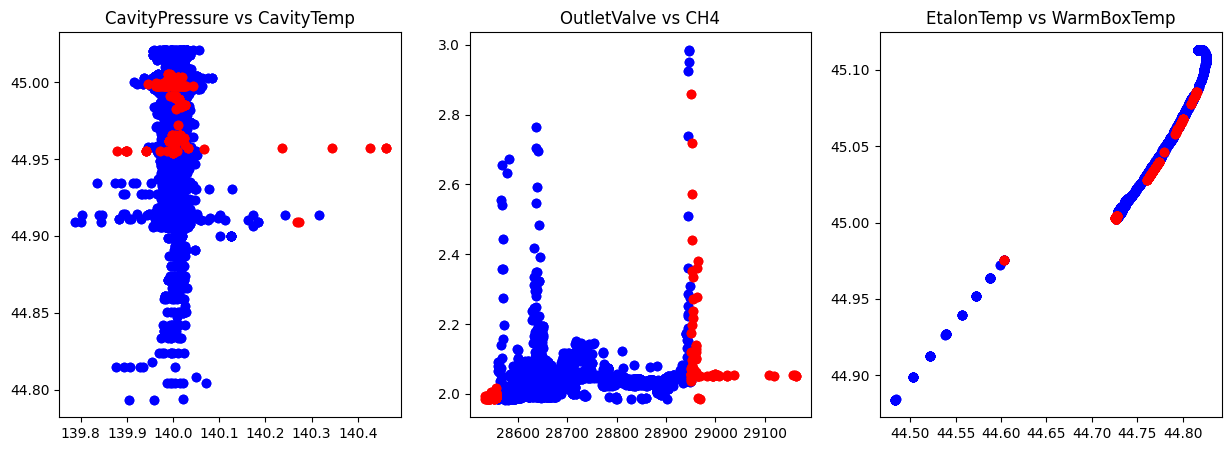

In [2]:
# SVM

from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data from CSV file
df = pd.read_csv("sample.csv")

# Extract the columns of interest
data = df[['CavityPressure', 'CavityTemp', 'OutletValve', 'CH4', 'EtalonTemp', 'WarmBoxTemp']].values

# Create the One-Class SVM model
model = svm.OneClassSVM(kernel='rbf', nu=0.05)

# Fit the model to the data
model.fit(data)

# Predict the labels for the data
labels = model.predict(data)

# Plot the data points with anomalies marked in red
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(data[labels==1, 0], data[labels==1, 1], c='blue')
plt.scatter(data[labels==-1, 0], data[labels==-1, 1], c='red')
plt.title('CavityPressure vs CavityTemp')

plt.subplot(1,3,2)
plt.scatter(data[labels==1, 2], data[labels==1, 3], c='blue')
plt.scatter(data[labels==-1, 2], data[labels==-1, 3], c='red')
plt.title('OutletValve vs CH4')

plt.subplot(1,3,3)
plt.scatter(data[labels==1, 4], data[labels==1, 5], c='blue')
plt.scatter(data[labels==-1, 4], data[labels==-1, 5], c='red')
plt.title('EtalonTemp vs WarmBoxTemp')

plt.show()


**LOF**

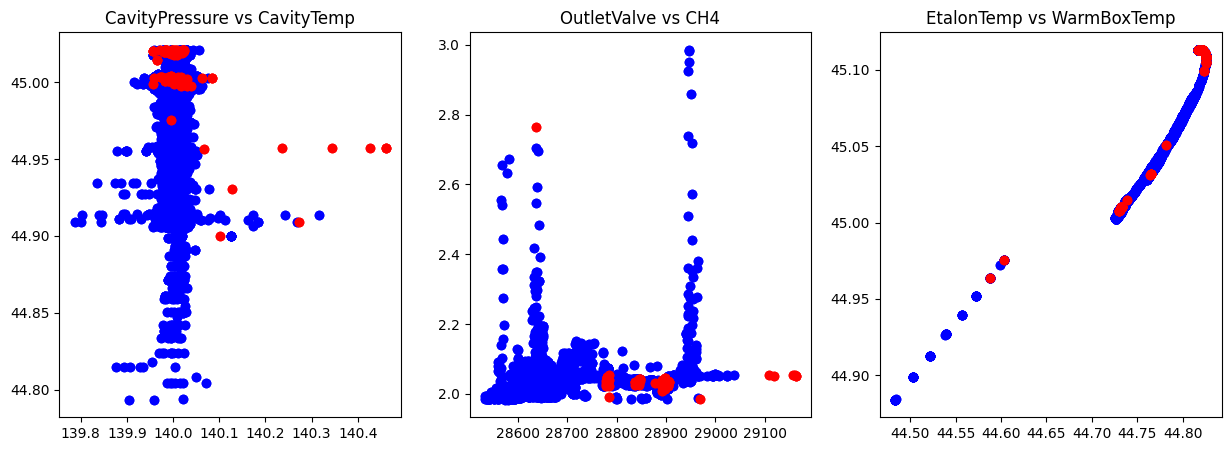

In [3]:
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data from CSV file
df = pd.read_csv("sample.csv")

# Extract the columns of interest
data = df[['CavityPressure', 'CavityTemp', 'OutletValve', 'CH4', 'EtalonTemp', 'WarmBoxTemp']].values

# Create the LOF model
model = LocalOutlierFactor(n_neighbors=30, contamination=0.02)

# Fit the model to the data and get the predicted labels
labels = model.fit_predict(data)

# Plot the data points with anomalies marked in red
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(data[labels==1, 0], data[labels==1, 1], c='blue')
plt.scatter(data[labels==-1, 0], data[labels==-1, 1], c='red')
plt.title('CavityPressure vs CavityTemp')

plt.subplot(1,3,2)
plt.scatter(data[labels==1, 2], data[labels==1, 3], c='blue')
plt.scatter(data[labels==-1, 2], data[labels==-1, 3], c='red')
plt.title('OutletValve vs CH4')

plt.subplot(1,3,3)
plt.scatter(data[labels==1, 4], data[labels==1, 5], c='blue')
plt.scatter(data[labels==-1, 4], data[labels==-1, 5], c='red')
plt.title('EtalonTemp vs WarmBoxTemp')

plt.show()


**Autoencoder based method (Keras) -> Deep Learning**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Load data from CSV file
df = pd.read_csv("sample.csv")

# Extract the columns of interest
data = df[['CavityPressure', 'CavityTemp', 'OutletValve', 'CH4', 'EtalonTemp', 'WarmBoxTemp']].values

# Scale the data using StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)

# Define the autoencoder model architecture
input_dim = data.shape[1]
encoding_dim = 2

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder on the data
autoencoder.fit(data, data, epochs=100, batch_size=32)

# Use the trained autoencoder to reconstruct the data and calculate reconstruction errors
reconstructions = autoencoder.predict(data)
errors = np.mean(np.square(data - reconstructions), axis=1)

# Plot the data points with anomalies marked in red
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(data[:,0], data[:,1], c='blue')
plt.scatter(data[errors > np.percentile(errors, 98), 0], data[errors > np.percentile(errors, 98), 1], c='red')
plt.title('CavityPressure vs CavityTemp')

plt.subplot(1,3,2)
plt.scatter(data[:,2], data[:,3], c='blue')
plt.scatter(data[errors > np.percentile(errors, 98), 2], data[errors > np.percentile(errors, 98), 3], c='red')
plt.title('OutletValve vs CH4')

plt.subplot(1,3,3)
plt.scatter(data[:,4], data[:,5], c='blue')
plt.scatter(data[errors > np.percentile(errors, 98), 4], data[errors > np.percentile(errors, 98), 5], c='red')
plt.title('EtalonTemp vs WarmBoxTemp')

plt.show()
